# 人脸识别 face_recognition

In [1]:
import matplotlib.pyplot as plt
import face_recognition

## 准备测试的图片

In [66]:
hu_ge1 = '../../image/hu_ge1.jpg'
hu_ge2 = '../../image/hu_ge2.jpg'
gao_yuan_yuan1 = '../../image/gao_yuan_yuan1.jpg'
gao_yuan_yuan2 = '../../image/gao_yuan_yuan2.jpg'

In [67]:
img_hu_ge1 = face_recognition.load_image_file(hu_ge1)
img_hu_ge2 = face_recognition.load_image_file(hu_ge2)
img_gao_yuan_yuan1 = face_recognition.load_image_file(gao_yuan_yuan1)
img_gao_yuan_yuan2 = face_recognition.load_image_file(gao_yuan_yuan2)

In [106]:
img_files = [hu_ge1, hu_ge2, gao_yuan_yuan1, gao_yuan_yuan2]
imgs = [img_hu_ge1, img_hu_ge2, img_gao_yuan_yuan1, img_gao_yuan_yuan2]

## 显示测试图片

In [103]:
"""显示所有的测试图片"""
def show_images(imgs):
    plt.figure(figsize=(20, 6))

    for i, img in enumerate(imgs):
        plt.subplot(1, len(imgs), i+1)
        plt.imshow(img)

    plt.show()

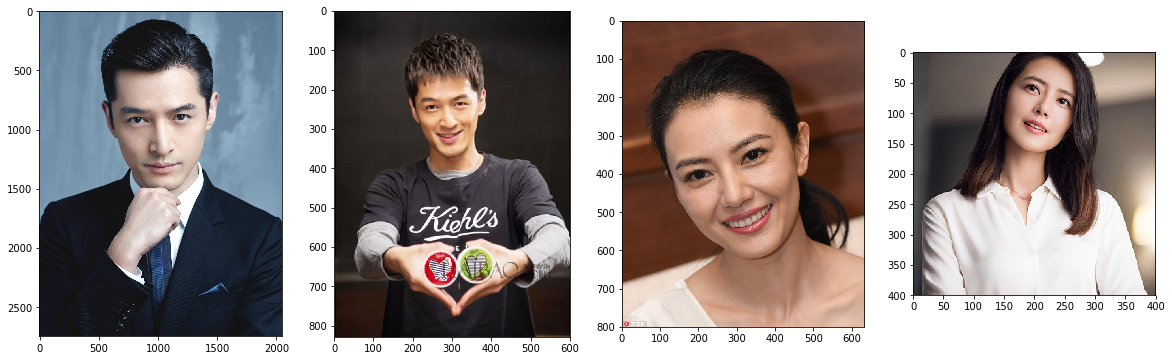

In [104]:
show_images(imgs)

## 人脸定位 face_locations
```
Help on function face_locations in module face_recognition.api:

face_locations(img, number_of_times_to_upsample=1, model='hog')
    Returns an array of bounding boxes of human faces in a image
    
    :param img: An image (as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :param model: Which face detection model to use. "hog" is less accurate but faster on CPUs. "cnn" is a more accurate
                  deep-learning model which is GPU/CUDA accelerated (if available). The default is "hog".
    :return: A list of tuples of found face locations in css (top, right, bottom, left) order
```

In [109]:
from PIL import Image
from PIL import ImageDraw

"""
解决函数 draw.rectangle 不能更改框的粗细问题。（图片大了缩小后就看不到细了）
rect (top, right, bottom, left)
"""
def draw_rectangle(draw, rect, outline='yellow', width=5):
    top_left = (rect[1], rect[0])
    bottom_right = (rect[3], rect[2])
    top_right = (rect[3], rect[0])
    bottom_left= (rect[1], rect[2])

    draw.line([top_left, top_right], fill=outline, width=width)
    draw.line([top_right, bottom_right], fill=outline, width=width)
    draw.line([bottom_right, bottom_left], fill=outline, width=width)
    draw.line([bottom_left, top_left], fill=outline, width=width)

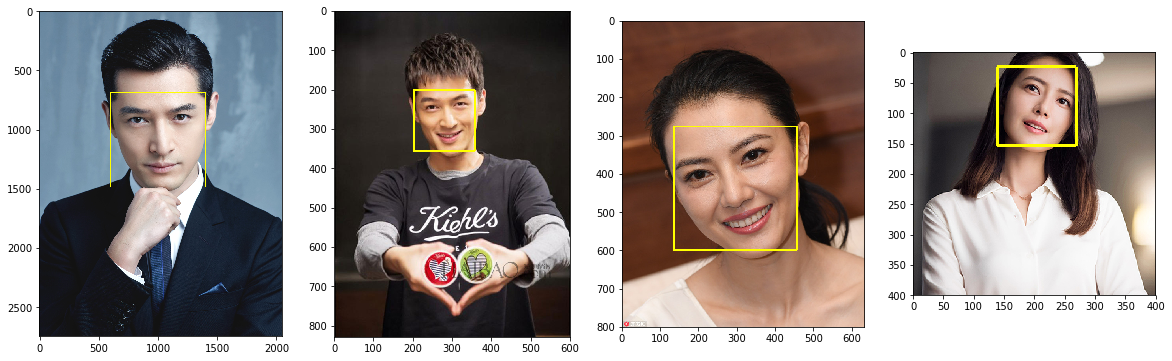

In [119]:
images = []
face_locations = []
for img_file, img in zip(img_files, imgs):
    image = Image.open(img_file)
    draw = ImageDraw.Draw(image)

    locations = face_recognition.face_locations(img)
    for location in locations:
        draw_rectangle(draw, location)

    images.append(image)
    face_locations.append(location)

show_images(images)

## 人脸特征 face_landmarks
```
Help on function face_landmarks in module face_recognition.api:

face_landmarks(face_image, face_locations=None)
    Given an image, returns a dict of face feature locations (eyes, nose, etc) for each face in the image
    
    :param face_image: image to search
    :param face_locations: Optionally provide a list of face locations to check.
    :return: A list of dicts of face feature locations (eyes, nose, etc)
```

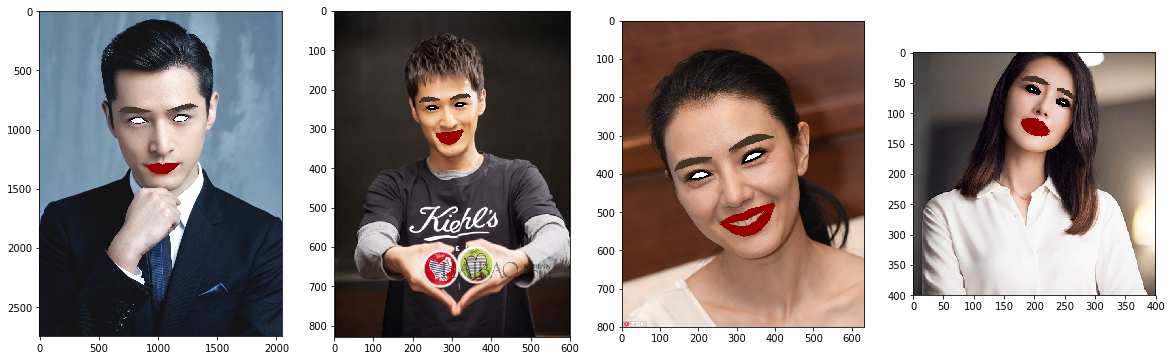

In [122]:
images = []
for img_file, img, location in zip(img_files, imgs, face_locations):
    image = Image.open(img_file)
    draw = ImageDraw.Draw(image)

    landmarks = face_recognition.face_landmarks(img)
    for landmark in landmarks:
        # Make the eyebrows into a nightmare
        draw.polygon(landmark['left_eyebrow'], fill=(68, 54, 39, 128))
        draw.polygon(landmark['right_eyebrow'], fill=(68, 54, 39, 128))
        draw.line(landmark['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
        draw.line(landmark['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

        # Gloss the lips
        draw.polygon(landmark['top_lip'], fill=(150, 0, 0, 128))
        draw.polygon(landmark['bottom_lip'], fill=(150, 0, 0, 128))
        draw.line(landmark['top_lip'], fill=(150, 0, 0, 64), width=8)
        draw.line(landmark['bottom_lip'], fill=(150, 0, 0, 64), width=8)

        # Sparkle the eyes
        draw.polygon(landmark['left_eye'], fill=(255, 255, 255, 30))
        draw.polygon(landmark['right_eye'], fill=(255, 255, 255, 30))

        # Apply some eyeliner
        draw.line(landmark['left_eye'] + [landmark['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
        draw.line(landmark['right_eye'] + [landmark['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

    images.append(image)

show_images(images) 

## 人脸编码 face_encodings

```
Help on function face_encodings in module face_recognition.api:

face_encodings(face_image, known_face_locations=None, num_jitters=1)
    Given an image, return the 128-dimension face encoding for each face in the image.
    
    :param face_image: The image that contains one or more faces
    :param known_face_locations: Optional - the bounding boxes of each face if you already know them.
    :param num_jitters: How many times to re-sample the face when calculating encoding. Higher is more accurate, but slower (i.e. 100 is 100x slower)
    :return: A list of 128-dimensional face encodings (one for each face in the image)
```

In [132]:
face_encodings = face_recognition.face_encodings(img_gao_yuan_yuan1)
print('shape: ', face_encodings[0].shape)
print(face_encodings)

shape:  (128,)
[array([-0.15218471,  0.04543398,  0.08135407, -0.1244722 , -0.12619573,
       -0.07531726, -0.10392591, -0.17041631,  0.16243555, -0.22996761,
        0.25302917, -0.13887683, -0.16839541, -0.01395728, -0.0536366 ,
        0.21128149, -0.1963969 , -0.1507161 ,  0.00092323,  0.00386699,
        0.11613788,  0.01014963, -0.04333076,  0.08612087, -0.1518023 ,
       -0.30835855, -0.13883939, -0.01988696, -0.05391752, -0.11424319,
       -0.01579594,  0.08383346, -0.17342573, -0.01447562, -0.02266047,
        0.15120402,  0.03854634, -0.12947522,  0.12591036, -0.01546302,
       -0.31534049,  0.05848898,  0.06675611,  0.22292326,  0.19040158,
       -0.04161254, -0.02867047, -0.1982428 ,  0.15676062, -0.16489175,
        0.02346728,  0.130144  , -0.00497321,  0.05156201,  0.03576522,
       -0.11995437,  0.07942472,  0.15309431, -0.16781238, -0.03457278,
        0.15608563, -0.03917921,  0.08235109, -0.10828722,  0.12925376,
        0.12934107, -0.05603201, -0.23172617,  0

In [137]:
## 获得所有图像的人脸特征
face_encodings = []
for img in imgs:
    encodings = face_recognition.face_encodings(img)
    face_encodings.append(encodings[0])

## 人脸特征比较 compare_faces
```
Help on function compare_faces in module face_recognition.api:

compare_faces(known_face_encodings, face_encoding_to_check, tolerance=0.6)
    Compare a list of face encodings against a candidate encoding to see if they match.
    
    :param known_face_encodings: A list of known face encodings
    :param face_encoding_to_check: A single face encoding to compare against the list
    :param tolerance: How much distance between faces to consider it a match. Lower is more strict. 0.6 is typical best performance.
    :return: A list of True/False values indicating which known_face_encodings match the face encoding to check
```

In [142]:
result = face_recognition.compare_faces(face_encodings[1:], face_encodings[0])
print(result)
result = face_recognition.compare_faces(face_encodings[2], face_encodings[:2]+face_encodings[3:])
print(result)

[True, False, False]
[False, False, True]


## 人脸特征距离 face_distance
```
Help on function face_distance in module face_recognition.api:

face_distance(face_encodings, face_to_compare)
    Given a list of face encodings, compare them to a known face encoding and get a euclidean distance
    for each comparison face. The distance tells you how similar the faces are.
    
    :param faces: List of face encodings to compare
    :param face_to_compare: A face encoding to compare against
    :return: A numpy ndarray with the distance for each face in the same order as the 'faces' array
```

In [143]:
result = face_recognition.face_distance(face_encodings[1:], face_encodings[0])
print(result)
result = face_recognition.face_distance(face_encodings[2], face_encodings[:2]+face_encodings[3:])
print(result)

[0.41888829 0.63558174 0.62249508]
[0.63558174 0.65251564 0.41772663]


## 测试设置number_of_times_to_upsample花费的时间

In [145]:
from IPython.display import display

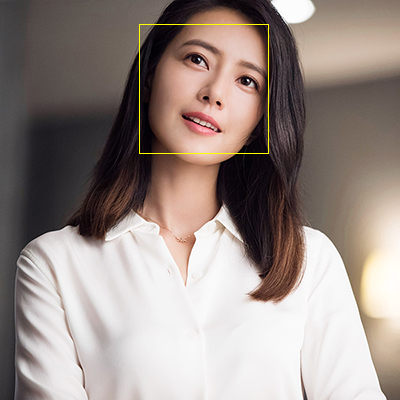

CPU times: user 216 ms, sys: 2.33 ms, total: 219 ms
Wall time: 218 ms


In [147]:
%%time

img = Image.open(gao_yuan_yuan2)
draw = ImageDraw.Draw(img)

"""
    face locations (top, right, bottom, left)
    number_of_times_to_upsample 值越大识别的人脸框越精细，花的时间越多，默认为1。
"""
locations = face_recognition.face_locations(img_gao_yuan_yuan2, number_of_times_to_upsample=1)
for location in locations:
    draw.rectangle((location[1], location[0], location[3], location[2]), outline='yellow')

display(img)

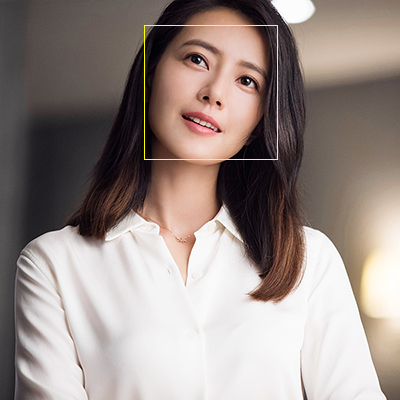

CPU times: user 485 ms, sys: 10.8 ms, total: 496 ms
Wall time: 494 ms


In [148]:
%%time
img = Image.open(gao_yuan_yuan2)
draw = ImageDraw.Draw(img)

"""face locations (top, right, bottom, left)"""
locations = face_recognition.face_locations(img_gao_yuan_yuan2, number_of_times_to_upsample=2)
for location in locations:
    draw.rectangle((location[1], location[0], location[3], location[2]), outline='yellow')

display(img)

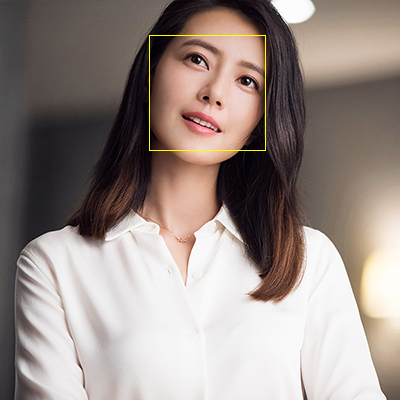

CPU times: user 1.57 s, sys: 65 ms, total: 1.63 s
Wall time: 1.63 s


In [149]:
%%time
img = Image.open(gao_yuan_yuan2)
draw = ImageDraw.Draw(img)

"""face locations (top, right, bottom, left)"""
locations = face_recognition.face_locations(img_gao_yuan_yuan2, number_of_times_to_upsample=3)
for location in locations:
    draw.rectangle((location[1], location[0], location[3], location[2]), outline='yellow')

display(img)

## 参考资料
* [好玩的人脸识别face_recognition安装+尝试+API详细](https://blog.csdn.net/weixin_39002448/article/details/81670430)
* [Is there a way to specify the width of a rectangle in PIL?](https://stackoverflow.com/questions/34255938/is-there-a-way-to-specify-the-width-of-a-rectangle-in-pil)
* [【python图像处理】几何图形的绘制与文字的绘制（ImageDraw类详解）](https://blog.csdn.net/guduruyu/article/details/71213717)
* [Detect eyes, nose, lips, and jaw with dlib, OpenCV, and Python](https://www.pyimagesearch.com/2017/04/10/detect-eyes-nose-lips-jaw-dlib-opencv-python/)
* [OpenCV detect face landmarks (ear-chin-ear line)](https://stackoverflow.com/questions/37210655/opencv-detect-face-landmarks-ear-chin-ear-line)
* [face_recognition.py](https://github.com/davisking/dlib/blob/master/python_examples/face_recognition.py)
* [dlib-face-recognition-android/jni/jni_recognition/recognizer.h](https://github.com/gv22ga/dlib-face-recognition-android/blob/master/jni/jni_recognition/recognizer.h)
* [dnn_face_recognition_ex.cpp](http://dlib.net/dnn_face_recognition_ex.cpp.html)
* [Deep face recognition with Keras, Dlib and OpenCV](http://krasserm.github.io/2018/02/07/deep-face-recognition/)
* [机器学习实战篇—人脸识别（Human Face Recognition）](https://blog.csdn.net/sqc3375177/article/details/78916217)